In [2]:
%matplotlib inline
import numpy as np
import netCDF4
import matplotlib.pyplot as plt

import xarray as xr


In [9]:
grid_path = 'http://barataria.tamu.edu:8080/thredds/dodsC/txla_nesting6_grid/txla_grd_v4_new.nc'
nc = netCDF4.Dataset(grid_path)
grd = xr.open_dataset(grid_path)
h = nc['h'][:]
pm = nc['pm'][:]
pn = nc['pn'][:]


In [11]:
lon_rho = nc['lon_rho'][:]
lat_rho = nc['lat_rho'][:]

In [4]:
dA = 1./(pm*pn)

In [5]:
dA.sum()/1e6

351959.25437832688

In [6]:
dAxr = 1./(grd.pm*grd.pn)

In [7]:
dAxr.sum()/1e6

<xarray.DataArray ()>
array(351959.2543783311)

In [12]:
llon = -94.5
rlon = -89.5
hmin = 5.
hmax = 100.
masks = [h>hmin, h<hmax, lon_rho> llon, lon_rho<rlon]
total_mask = reduce(np.logical_and, masks)

In [13]:
dA[total_mask].sum()/1e6

68272.153521472763

In [15]:
dAxr.where(total_mask).sum()/1e6

<xarray.DataArray ()>
array(68272.15352147285)

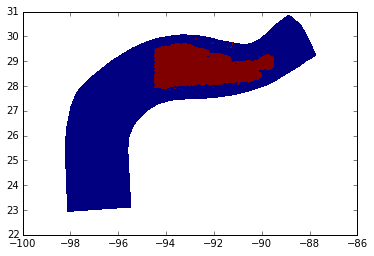

In [11]:
plt.pcolormesh(lon_rho,lat_rho,total_mask)